# **Bayesian**
---
## **Summary**
* Extremely fast and low computaton cost for both training and prediction
* Straightforward probabilistic prediction and easily interpretable
* Very quick-and-dirty baseline for a classification problem
* Solid results in a variety of settings but few tunable parameters
* Well suitable for matching naive assumption, well-separated categories, and/or very high-dimensional data
* Normal (Gaussian), multinominal, and Bernoulli distributions
    
## **References**
1. Goodfellow, I, Bengio, Y., Courville, Aaron. 2016. Deep learning. The MIT Press.
2. Albon, C. 2018. Python Machine Learning Cookbook

## **Concept**
Bayes' theorem
$P(A|B)=\frac{P(B|A)P(A)}{P(B)}\Longrightarrow P(y|x_1,...,x_j) = \frac{P(x_1,...,x_j|y)P(y)}{P(x_1,...,x_j)}$

Making the decision using _Generative Model_: 
the ratio of the posterior probablities for each label:
$P(L | features) = \frac{P(features | L)P(L)}{P(features)}\Longrightarrow\frac{P(L_1|features)}{P(L_2|features)} = \frac{P(features|L_1)P(L_1)}{P(features|L_2)P(L_2)}$

### 1. Gaussian Navie Bayes
* <font size=3>Assumption: Data from each label is drawn from a simple Gaussian distribution</font>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

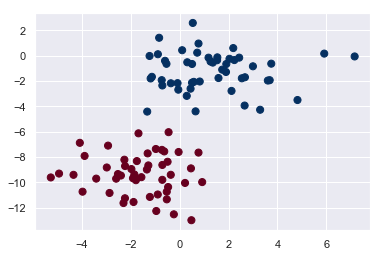

In [6]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers =2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

Text(0.5, 1.0, 'Visualization of the Gaussian naive Bayes model')

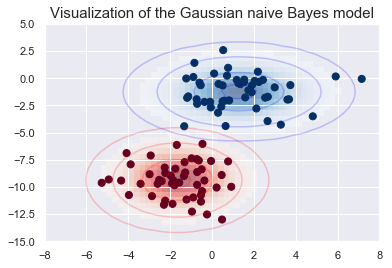

In [28]:
# Assuming the data is described by Gaussian distribution with no covariance btw dimensions;
# fitting the model by finding the mean and standard deviation of the points with each label
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers =2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size = 14)

xlim = (-8, 8)
ylim = (-15, 5)
xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu)**2 / std**2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5, cmap=color.title()+'s')
    ax.contour(xx, yy, P.reshape(xx.shape), 
               levels = [0.01, 0.1, 0.5, 0.9],
              colors = color, alpha =0.2)


ax.set(xlim = xlim, ylim = ylim)
plt.title('Visualization of the Gaussian naive Bayes model', size=15)

* The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses.
* With this generative model in place for each class, we have a simple recipe to compute the likelihood P features   L1   for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

Text(0.5, 1.0, 'Visualization of the Gaussian naive Bayes classification')

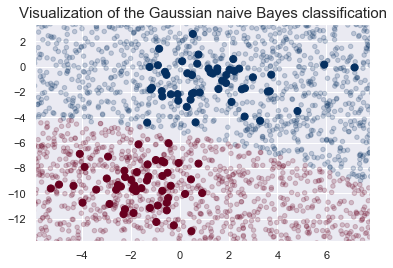

In [26]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

rng = np.random.RandomState(0)
X_new = [-6, -14] + [14, 18]*rng.rand(2000, 2)
y_new = model.predict(X_new)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=20, cmap='RdBu', alpha = 0.2)
plt.axis(lim)
plt.title('Visualization of the Gaussian naive Bayes classification', size=15)

* the boundary in Gaussian Naive Bayes is quadratic

In [31]:
# produce the probablilites of the classification
y_prob = model.predict_proba(X_new)
y_prob[:5].round(2) ## coloumns indiate the posterior probablities of the first and second labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

### 2. Multinomial Navie Bayes
* <font size=3>Assumption: Features are generated from a simple multinomial distribution</font>
* <font size=3>Most appropriate for features that represent counts or count rates</font>

Example: Classifying text by counting sparse words

In [34]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [40]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset ='train', categories = categories)
test = fetch_20newsgroups(subset ='test', categories = categories)
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



#### Main Appoach
* Using TF-IDF vectorizer to convert the content of each string into a vector of numbers 
* Creating a pipeline that attaches it to a multinominal naive Bayes classifier 

Text(0.5, 1.0, 'Confusion matrix for the multinominal naive Bayes text classifier')

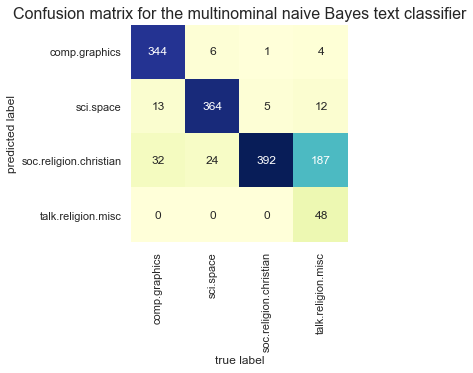

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)
labels = model.predict(test.data)

from sklearn.metrics import confusion_matrix
mt = confusion_matrix(test.target, labels)
sns.heatmap(mt.T, square = True, annot = True, fmt = 'd', cbar = False, cmap="YlGnBu",
            xticklabels = train.target_names, yticklabels = train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion matrix for the multinominal naive Bayes text classifier', size = 16)

* A quick and convient tool to determine the category for any string using the predict() method of this pipeline

In [67]:
def predict_category (string, train_set, train_model):
    pred = train_model.predict([string])
    return train_set.target_names[pred[0]]

print(predict_category('sending a payload to the ISS', train, model))
print(predict_category('discussing islam vs atheism', train, model))
print(predict_category('determining the screen resolution', train, model))

sci.space
soc.religion.christian
comp.graphics


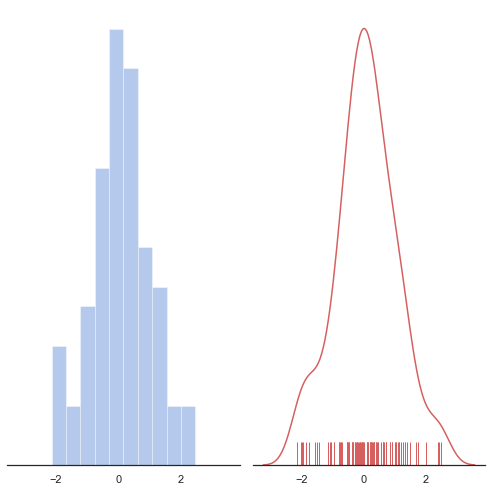

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[1])

plt.setp(axes, yticks=[])
plt.tight_layout()